###                          SCA WEEK 3 ASSIGNMENT 
The Chinook Database holds information about a music store.For the assignment,you will be assisting the chinook team to understanding the media in the store,their customers and employees and their invoice information by answering the following questions using pandas,numpy,and matplotlib to vizualize them below. 

####    Question 1
which city has the best customers?we would like to throw a promotional Music Festival in the city we made the most money .Write a query that returns the 1 city that has the highest sum of invoice totals .Return both the city name and the sum of all invoices totals. 

In [1]:
#importing all python libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Invoice.csv')
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98
1,2,4,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96
2,3,8,NaN,Grétrystraat 63,Brussels,NaN,Belgium,1000,5.94
3,4,14,NaN,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,NaN,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,NaN,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,NaN,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,NaN,"Rua dos Campeões Europeus de Viena, 4350",Porto,NaN,Portugal,NaN,8.91
410,411,44,NaN,Porthaninkatu 9,Helsinki,NaN,Finland,00530,13.86


In [3]:
#this is to check the data types 
df.dtypes


InvoiceId              int64
CustomerId             int64
InvoiceDate          float64
BillingAddress        object
BillingCity           object
BillingState          object
BillingCountry        object
BillingPostalCode     object
Total                float64
dtype: object

In [4]:
#This shows statistical summary of the data 
df.describe(include="all")

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
count,412.000000,412.000000,0.0,412,412,210,412,384,412.000000
unique,NaN,NaN,NaN,59,53,25,24,55,NaN
top,NaN,NaN,NaN,700 W Pender Street,Berlin,CA,USA,70174,NaN
freq,NaN,NaN,NaN,7,14,21,91,7,NaN
mean,206.500000,29.929612,NaN,NaN,NaN,NaN,NaN,NaN,5.651942
std,119.078406,17.010585,NaN,NaN,NaN,NaN,NaN,NaN,4.745320
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.990000
25%,103.750000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.980000
50%,206.500000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.960000
75%,309.250000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.910000


In [5]:
df.info

<bound method DataFrame.info of      InvoiceId  CustomerId  InvoiceDate  \
0            1           2          NaN   
1            2           4          NaN   
2            3           8          NaN   
3            4          14          NaN   
4            5          23          NaN   
..         ...         ...          ...   
407        408          25          NaN   
408        409          29          NaN   
409        410          35          NaN   
410        411          44          NaN   
411        412          58          NaN   

                               BillingAddress BillingCity BillingState  \
0                     Theodor-Heuss-Straße 34   Stuttgart          NaN   
1                            Ullevålsveien 14        Oslo          NaN   
2                             Grétrystraat 63    Brussels          NaN   
3                              8210 111 ST NW    Edmonton           AB   
4                             69 Salem Street      Boston           MA   
..     

In [6]:
df.columns

Index(['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress',
       'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode',
       'Total'],
      dtype='object')

In [51]:
customer_df =df[['BillingCity', 'Total']]
customer_df


,BillingCity,Total
0,Stuttgart,1.98
1,Oslo,3.96
2,Brussels,5.94
3,Edmonton,8.91
4,Boston,13.86
...,...,...
407,Madison,3.96
408,Toronto,5.94
409,Porto,8.91
410,Helsinki,13.86


In [49]:
#to check if we have missing value in the dataframe
df.isnull().sum()

InvoiceId              0
CustomerId             0
InvoiceDate          412
BillingAddress         0
BillingCity            0
BillingState         202
BillingCountry         0
BillingPostalCode     28
Total                  0
dtype: int64

In [52]:
customer = customer_df.groupby(["BillingCity","Total"]).count()
customer.head(50)

Empty DataFrame
Columns: []
Index: [(Amsterdam, 0.99), (Amsterdam, 1.98), (Amsterdam, 3.96), (Amsterdam, 8.91), (Amsterdam, 8.94), (Amsterdam, 13.86), (Bangalore, 1.98), (Bangalore, 1.99), (Bangalore, 3.96), (Bangalore, 5.94), (Bangalore, 8.91), (Bangalore, 13.86), (Berlin, 0.99), (Berlin, 1.98), (Berlin, 3.96), (Berlin, 5.94), (Berlin, 8.91), (Berlin, 13.86), (Bordeaux, 0.99), (Bordeaux, 1.98), (Bordeaux, 3.96), (Bordeaux, 3.98), (Bordeaux, 5.94), (Bordeaux, 8.91), (Bordeaux, 13.86), (Boston, 0.99), (Boston, 1.98), (Boston, 3.96), (Boston, 5.94), (Boston, 8.91), (Boston, 13.86), (Brasília, 0.99), (Brasília, 1.98), (Brasília, 3.96), (Brasília, 5.94), (Brasília, 8.91), (Brasília, 13.86), (Brussels, 0.99), (Brussels, 1.98), (Brussels, 3.96), (Brussels, 5.94), (Brussels, 8.91), (Brussels, 13.86), (Budapest, 0.99), (Budapest, 1.98), (Budapest, 3.96), (Budapest, 5.94), (Budapest, 8.91), (Budapest, 21.86), (Buenos Aires, 0.99)]

In [78]:
#To check for the best city
grouping= customer_df.groupby("BillingCity")["Total"].sum().sort_values(ascending=False).head(1)
grouping
    

BillingCity
Prague    90.24
Name: Total, dtype: float64

The Best City is Prague with the Total of 90.24

### Question 2
which country has the most invoices?Use the **invoice**  table to determine the countries that have the most invoices.Provide a table of **BillingCountry** and **invoices** ordered by the number of invoices for each country.The country with the most invoices should appear first.  

In [15]:
#import the dataframe with the invoice table
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98
1,2,4,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96
2,3,8,NaN,Grétrystraat 63,Brussels,NaN,Belgium,1000,5.94
3,4,14,NaN,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,NaN,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,NaN,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,NaN,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,NaN,"Rua dos Campeões Europeus de Viena, 4350",Porto,NaN,Portugal,NaN,8.91
410,411,44,NaN,Porthaninkatu 9,Helsinki,NaN,Finland,00530,13.86


In [94]:
#selecting the column we needed in the dataframe
Highest_ =df[['InvoiceId', 'BillingCountry',]]
Highest_

,InvoiceId,BillingCountry
0,1,Germany
1,2,Norway
2,3,Belgium
3,4,Canada
4,5,USA
...,...,...
407,408,USA
408,409,Canada
409,410,Portugal
410,411,Finland


In [96]:
#to get the BillingCountry with the highest invoiceId
Billing_Country=Highest_.groupby("BillingCountry")["InvoiceId"].count().sort_values(ascending=False).reset_index()
Billing_Country


,BillingCountry,InvoiceId
0,USA,91
1,Canada,56
2,Brazil,35
3,France,35
4,Germany,28
5,United Kingdom,21
6,Czech Republic,14
7,Portugal,14
8,India,13
9,Norway,7


 The highest Biling country is **USA** which as the invoiceId 91


###   Question 3
Who is the best customer?
The customer who has spend the most money will be decleared the best customer.Build a query that returns the person who has spend the most money. 

In [19]:
#Importing the DataFrame with in Invoice data
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98
1,2,4,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96
2,3,8,NaN,Grétrystraat 63,Brussels,NaN,Belgium,1000,5.94
3,4,14,NaN,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,NaN,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,NaN,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,NaN,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,NaN,"Rua dos Campeões Europeus de Viena, 4350",Porto,NaN,Portugal,NaN,8.91
410,411,44,NaN,Porthaninkatu 9,Helsinki,NaN,Finland,00530,13.86


In [100]:
#Merging the Customer file and the Invoice file
customer_invoice = pd.merge(df1, df[['CustomerId', 'Total']], on = 'CustomerId', how = 'inner')
customer_invoice.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId,Total
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,3.98
1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,3.96
2,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,5.94
3,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,0.99
4,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,1.98


In [105]:
#arrange in descending order to know the customer with highest spending
customer_invoice.groupby('CustomerId')['Total'].sum().sort_values(ascending= False).head(1)

CustomerId
6    49.62
Name: Total, dtype: float64

This shows CustomerId **6** has the highest spending by total 49.62

###  Question 4
Use your query to return the email,first name,last name and Genre of all Rock Music Listeners.Return your list ordered alphabetically  by email address strating from **A**.


In [23]:
#Importing the customer data
df1=pd.read_csv('Customer.csv')
df1

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5
2,3,François,Tremblay,NaN,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,NaN,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,NaN,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,NaN,Rilská 3174/6,Prague,NaN,Czech Republic,14300,+420 2 4177 0449,NaN,hholy@gmail.com,5
6,7,Astrid,Gruber,NaN,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,NaN,Austria,1010,+43 01 5134505,NaN,astrid.gruber@apple.at,5
7,8,Daan,Peeters,NaN,Grétrystraat 63,Brussels,NaN,Belgium,1000,+32 02 219 03 03,NaN,daan_peeters@apple.be,4
8,9,Kara,Nielsen,NaN,Sønder Boulevard 51,Copenhagen,NaN,Denmark,1720,+453 3331 9991,NaN,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [24]:
#Importing the Genre data
df2=pd.read_csv('Genre.csv')
df2

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [25]:
#Importing the Track Data
df3=pd.read_csv('Track.csv')
df3

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,NaN,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,NaN,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [26]:
#Merging two data frames together
Genre=pd.merge(df2,df3,how ="inner" ,on="GenreId")
Genre

,GenreId,Name_x,TrackId,Name_y,AlbumId,MediaTypeId,Composer,Milliseconds,Bytes,UnitPrice
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,Rock,2,Balls to the Wall,2,2,NaN,342562,5510424,0.99
2,1,Rock,3,Fast As a Shark,3,2,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,1,Rock,4,Restless and Wild,3,2,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,1,Rock,5,Princess of the Dawn,3,2,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...,...
3498,24,Classical,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,NaN,286741,4718950,0.99
3499,24,Classical,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,Franz Schubert,139200,2283131,0.99
3500,24,Classical,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,Claudio Monteverdi,66639,1189062,0.99
3501,24,Classical,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [27]:
Genre1=Genre[['GenreId', 'Name_x', 'TrackId',]]
Genre1

,GenreId,Name_x,TrackId
0,1,Rock,1
1,1,Rock,2
2,1,Rock,3
3,1,Rock,4
4,1,Rock,5
...,...,...,...
3498,24,Classical,3499
3499,24,Classical,3500
3500,24,Classical,3501
3501,24,Classical,3502


In [28]:
RockGenre=Genre1.groupby(["Name_x"]).count()
RockGenre

,GenreId,TrackId
Name_x,,
Alternative,40,40
Alternative & Punk,332,332
Blues,81,81
Bossa Nova,15,15
Classical,74,74
Comedy,17,17
Drama,64,64
Easy Listening,24,24
Electronica/Dance,30,30


In [29]:
RockGenre.sort_values(["GenreId"], axis = 0, ascending = False)

,GenreId,TrackId
Name_x,,
Rock,1297,1297
Latin,579,579
Metal,374,374
Alternative & Punk,332,332
Jazz,130,130
TV Shows,93,93
Blues,81,81
Classical,74,74
Drama,64,64


In [30]:
#Importing the InvoiceLine data
df4=pd.read_csv('InvoiceLine.csv')
df4


,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [31]:
query=df1[['Email', 'FirstName', 'LastName',]]
query

,Email,FirstName,LastName
0,luisg@embraer.com.br,Luís,Gonçalves
1,leonekohler@surfeu.de,Leonie,Köhler
2,ftremblay@gmail.com,François,Tremblay
3,bjorn.hansen@yahoo.no,Bjørn,Hansen
4,frantisekw@jetbrains.com,František,Wichterlová
5,hholy@gmail.com,Helena,Holý
6,astrid.gruber@apple.at,Astrid,Gruber
7,daan_peeters@apple.be,Daan,Peeters
8,kara.nielsen@jubii.dk,Kara,Nielsen
9,eduardo@woodstock.com.br,Eduardo,Martins


In [32]:
#Sorting values Alphabetically
query.sort_values(["Email"], axis = 0, ascending = True)

,Email,FirstName,LastName
31,aaronmitchell@yahoo.ca,Aaron,Mitchell
10,alero@uol.com.br,Alexandre,Rocha
6,astrid.gruber@apple.at,Astrid,Gruber
3,bjorn.hansen@yahoo.no,Bjørn,Hansen
38,camille.bernard@yahoo.fr,Camille,Bernard
7,daan_peeters@apple.be,Daan,Peeters
55,diego.gutierrez@yahoo.ar,Diego,Gutiérrez
19,dmiller@comcast.com,Dan,Miller
39,dominiquelefebvre@gmail.com,Dominique,Lefebvre
29,edfrancis@yachoo.ca,Edward,Francis


This shows the Email starting from **A**

### Question 5
We want to find out the most popular music genre for each country.we determine the most popular genre as the highest amount of purchases.Write a query that returns each country along with the top genre with the highest amount of purchases.Write a query that returns each country along with the top genre for countries where the maximum number of purchases is shared all genres.For this query,you will need to use the **Invoice,InvoiceLine,Customer,Track,and Genre tables.**

In [33]:
#we describe the Invoiceline data first
df4.describe()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,1120.500000,206.868750,1717.734375,1.039554,1.0
std,646.776623,119.134877,993.797999,0.217069,0.0
min,1.000000,1.000000,1.000000,0.990000,1.0
25%,560.750000,103.000000,874.000000,0.990000,1.0
50%,1120.500000,207.000000,1708.000000,0.990000,1.0
75%,1680.250000,311.000000,2560.000000,0.990000,1.0
max,2240.000000,412.000000,3500.000000,1.990000,1.0


In [34]:
#Merging together df4,df
Customer_purchase = pd.merge(df4,df[['InvoiceId', 'CustomerId', 'BillingCountry']], on ='InvoiceId', how = 'left')
Customer_purchase

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,CustomerId,BillingCountry
0,1,1,2,0.99,1,2,Germany
1,2,1,4,0.99,1,2,Germany
2,3,2,6,0.99,1,4,Norway
3,4,2,8,0.99,1,4,Norway
4,5,2,10,0.99,1,4,Norway
...,...,...,...,...,...,...,...
2235,2236,411,3136,0.99,1,44,Finland
2236,2237,411,3145,0.99,1,44,Finland
2237,2238,411,3154,0.99,1,44,Finland
2238,2239,411,3163,0.99,1,44,Finland


The Customer_purchase dataframe can now be completed by adding the genre for each track purchased.

In [35]:
#merging genre data with customer purchase
Customer_purchase = pd.merge(Customer_purchase,Genre1,on = 'TrackId',how ='left')
Customer_purchase

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,CustomerId,BillingCountry,GenreId,Name_x
0,1,1,2,0.99,1,2,Germany,1,Rock
1,2,1,4,0.99,1,2,Germany,1,Rock
2,3,2,6,0.99,1,4,Norway,1,Rock
3,4,2,8,0.99,1,4,Norway,1,Rock
4,5,2,10,0.99,1,4,Norway,1,Rock
...,...,...,...,...,...,...,...,...,...
2235,2236,411,3136,0.99,1,44,Finland,3,Metal
2236,2237,411,3145,0.99,1,44,Finland,3,Metal
2237,2238,411,3154,0.99,1,44,Finland,7,Latin
2238,2239,411,3163,0.99,1,44,Finland,7,Latin


In [38]:
#Revenue total for each country by genre
Genre_total =pd.DataFrame(Customer_purchase.groupby(['BillingCountry','Name_x'], as_index=False)['UnitPrice'].sum()) 
Genre_total

,BillingCountry,Name_x,UnitPrice
0,Argentina,Alternative & Punk,8.91
1,Argentina,Easy Listening,1.98
2,Argentina,Jazz,1.98
3,Argentina,Latin,7.92
4,Argentina,Metal,6.93
...,...,...,...
232,United Kingdom,Pop,1.98
233,United Kingdom,R&B/Soul,1.98
234,United Kingdom,Reggae,4.95
235,United Kingdom,Rock,36.63


We can now find the highest revenue of a single genre from each country

In [39]:
#Highest total for each country
max_total =pd.DataFrame(Genre_total.groupby('BillingCountry', as_index=False)['UnitPrice'].max())
max_total

,BillingCountry,UnitPrice
0,Argentina,8.91
1,Australia,21.78
2,Austria,14.85
3,Belgium,20.79
4,Brazil,80.19
5,Canada,105.93
6,Chile,8.91
7,Czech Republic,24.75
8,Denmark,20.79
9,Finland,17.82


In [40]:
#most popular genre by country
pd.merge(max_total,Genre_total, on =['UnitPrice','BillingCountry'], how ='left')

,BillingCountry,UnitPrice,Name_x
0,Argentina,8.91,Alternative & Punk
1,Argentina,8.91,Rock
2,Australia,21.78,Rock
3,Austria,14.85,Rock
4,Belgium,20.79,Rock
5,Brazil,80.19,Rock
6,Canada,105.93,Rock
7,Chile,8.91,Rock
8,Czech Republic,24.75,Rock
9,Denmark,20.79,Rock


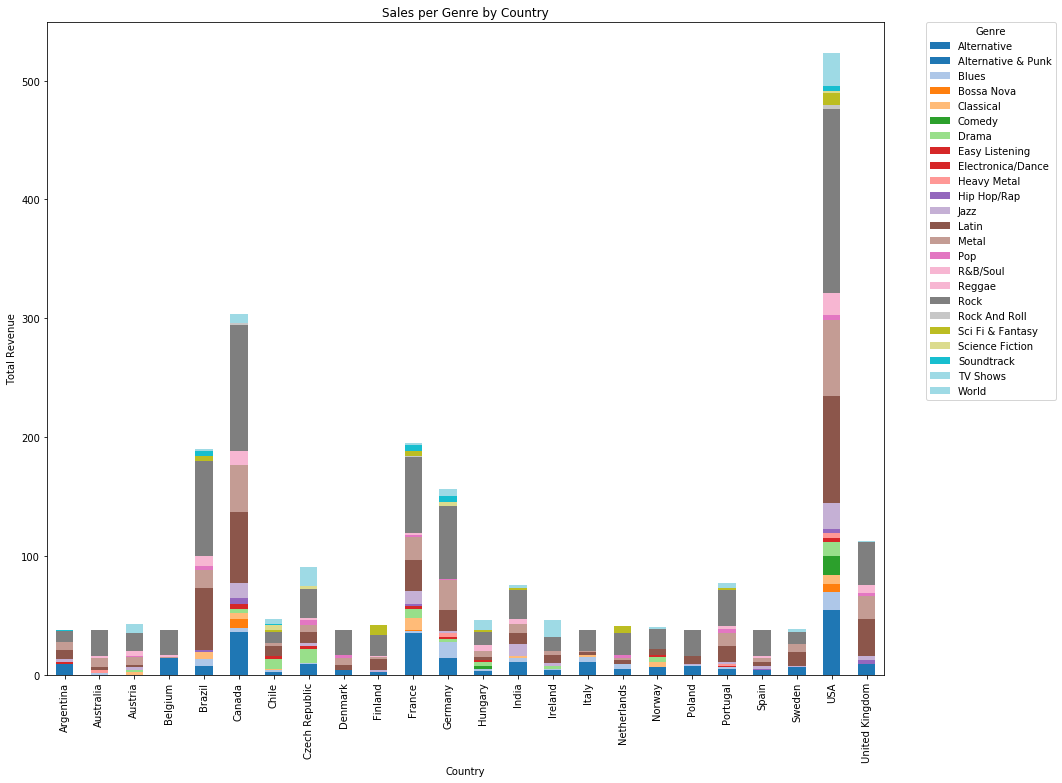

In [41]:
#we will now plot a graph to show total revenue from each genre  by country
fig,ax =plt.subplots(figsize=(15,12))
Customer_purchase.groupby(['BillingCountry','Name_x'])['UnitPrice'].sum().unstack().plot(kind='bar' , ax=ax, stacked=True,cmap="tab20")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0., title ="Genre")
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Sales per Genre by Country')
plt.show()